In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sber_data = pd.read_csv('data/sber_data.csv', sep=',')

# fig = plt.figure(figsize=(20,6))
# boxplot = sns.boxplot(data= sber_data,
#                       x= 'price_doc',
#                       y= 'ecology',
#                       orient= 'h',
#                       width= 3000);
# boxplot.set_xlabel('Price')
# boxplot.set_ylabel('Ecology')
fig = px.box(data_frame= sber_data,
             x= 'price_doc',
             color= 'ecology')

fig.show()


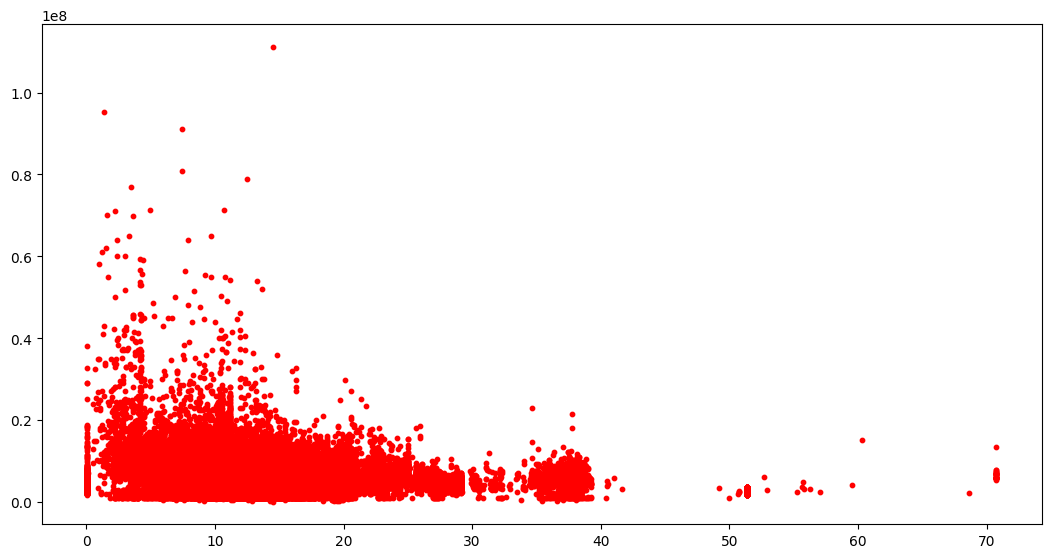

In [2]:
fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([0,0,1,1])
axes.scatter(y= sber_data['price_doc'],
             x= sber_data['kremlin_km'],
             s= 10,
             marker='o',
             c= 'red');



hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

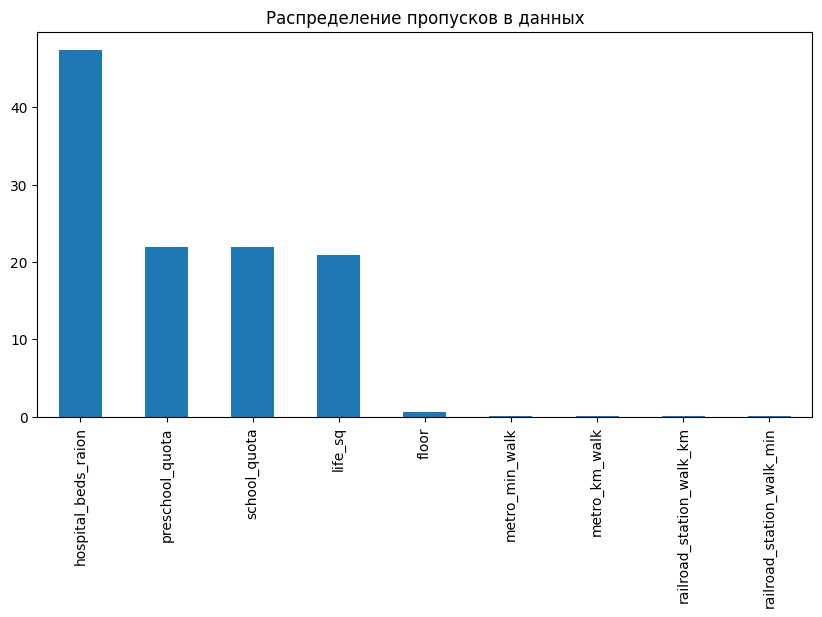

In [3]:
#Для этого вычислим средний по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце.
cols_null_percent = sber_data.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
display(cols_with_null)
cols_with_null.plot(kind='bar',
                    figsize=(10,5),
                    title='Распределение пропусков в данных');

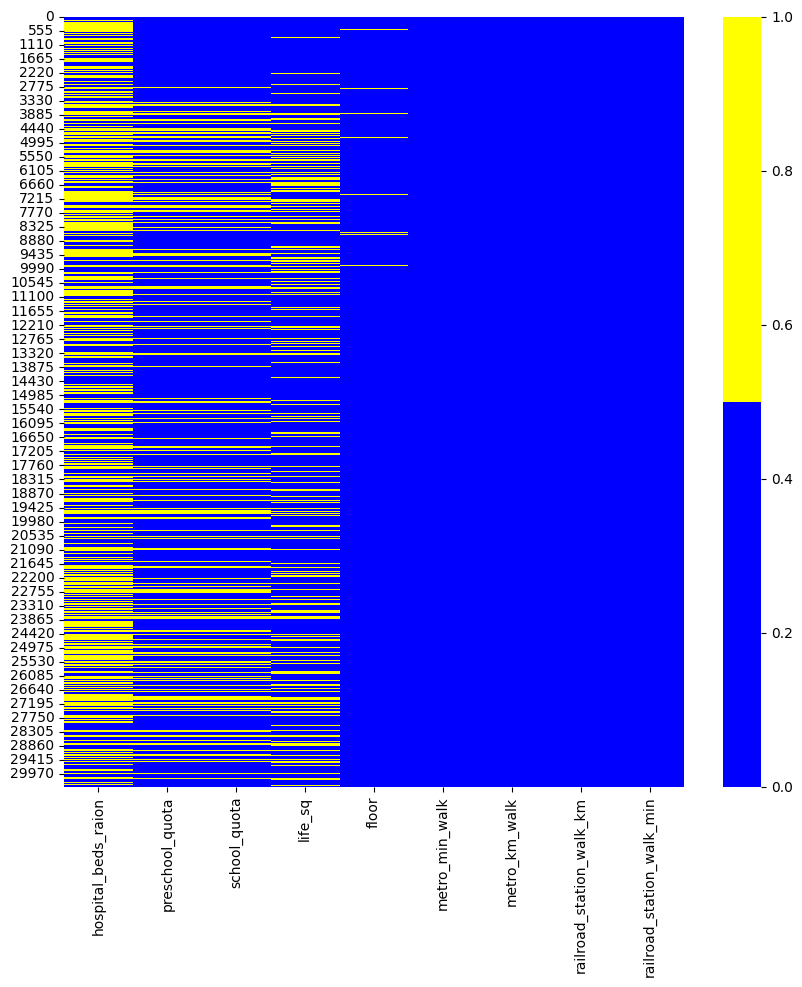

In [4]:
# Ещё один распространённый способ визуализации пропусков — тепловая карта.
# Её часто используют, когда столбцов с пропусками не так много (меньше 10). 
# Она позволяет понять не только соотношение пропусков в данных, но и их характерное местоположение в таблице.
# Для создания такой тепловой карты можно воспользоваться результатом метода isnull(). 
# Ячейки таблицы, в которых есть пропуск, будем отмечать жёлтым цветом, а остальные — синим. 
# Для этого создадим собственную палитру цветов тепловой карты с помощью метода color_pallete() из библиотеки seaborn.
color =['blue', 'yellow']
fig = plt.figure(figsize=(10,10))
cols = cols_with_null.index
ax = sns.heatmap(sber_data[cols].isnull(),
                 cmap=sns.color_palette(color));
# На полученной тепловой карте мы не видим чётких процентных соотношений для числа пропусков в данных,
# однако мы можем увидеть места их концентрации в таблице.
# Например, видно, что признаки preschool_quota и school_quota очень сильно связаны друг с другом по части пропусков: 
# во всех записях, где хотя бы один не определён, не указан и второй (жёлтые линии для двух этих признаков полностью совпадают друг с другом).

In [5]:
#Отбрасывание записей и признаков
drop_data = sber_data.copy()
thresh = drop_data.shape[0]*0.7 #устанавливаем порог на удаление 30%
drop_data = drop_data.dropna(thresh=thresh, axis=1) # удаляем столбцы
drop_data = drop_data.dropna(how='any', axis=0) #удаляем строки если есть хотя бы один пропуск
drop_data.isnull().mean() #доля пропущенных значений
print(drop_data.shape)


(20888, 60)


In [6]:
#Заполнение недостающих значений константами
fill_data = sber_data.copy()
values = {
    'life_sq':fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
fill_data = fill_data.fillna(values)
fill_data.isnull().mean()


id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

In [7]:
#Заполнение недостающих значений константами с добавлением индикатора
indicator_data = sber_data.copy()
cols_null_percent = sber_data.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
for col in cols_with_null.index:
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
values = {
    'life_sq':fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
    
}    
indicator_data = indicator_data.fillna(values)
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

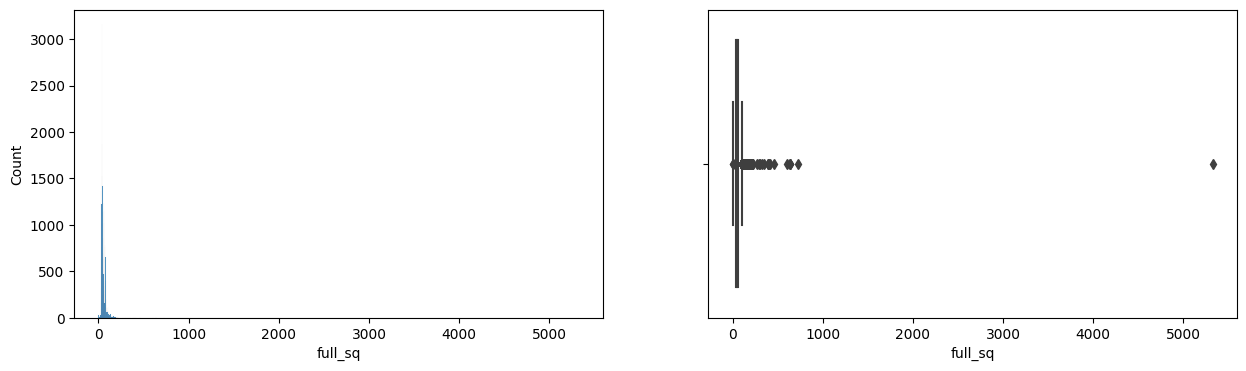

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
histplot = sns.histplot(data=sber_data, x= 'full_sq', ax=axes[0])
boxplot= sns.boxplot(data=sber_data, x='full_sq', ax= axes[1])

In [9]:
#метод Тьюки
def outliers_iqr(data, feature):
    x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'результирующее число записей: {cleaned.shape[0]}')

число выбросов по методу Тьюки: 963
результирующее число записей: 29508


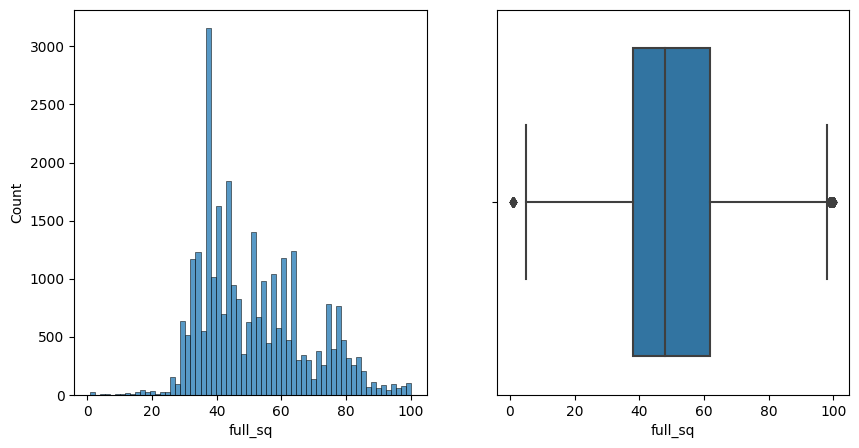

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
histplot = sns.histplot(data=cleaned, x= 'full_sq', ax= axes[0])
boxplot = sns.boxplot(data= cleaned, x= 'full_sq', ax= axes[1])

число выбросов по методу Тьюки: 59
результирующее число записей: 30412


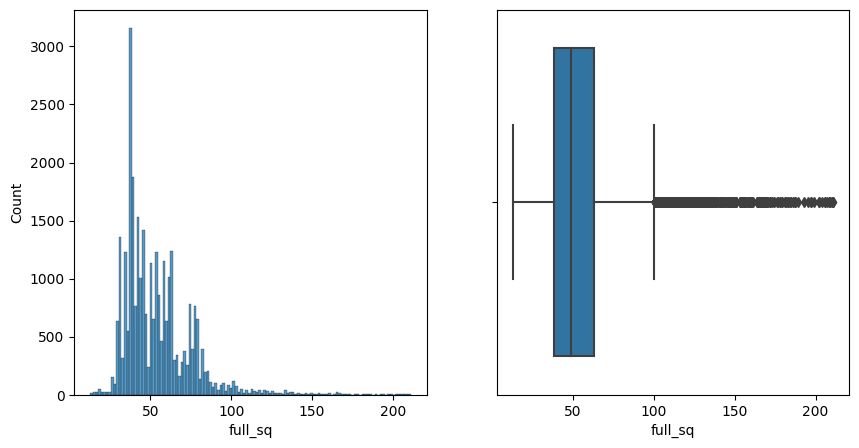

In [11]:
def outliers_iqr_mod(data, feature, left = 1.5, right =1.5):
    x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq',left = 1, right = 6)
print(f'число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'результирующее число записей: {cleaned.shape[0]}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
histplot = sns.histplot(data=cleaned, x= 'full_sq', ax= axes[0])
boxplot = sns.boxplot(data=cleaned, x= 'full_sq', ax=axes[1])

Число выбросов:59
Число записей: 30412


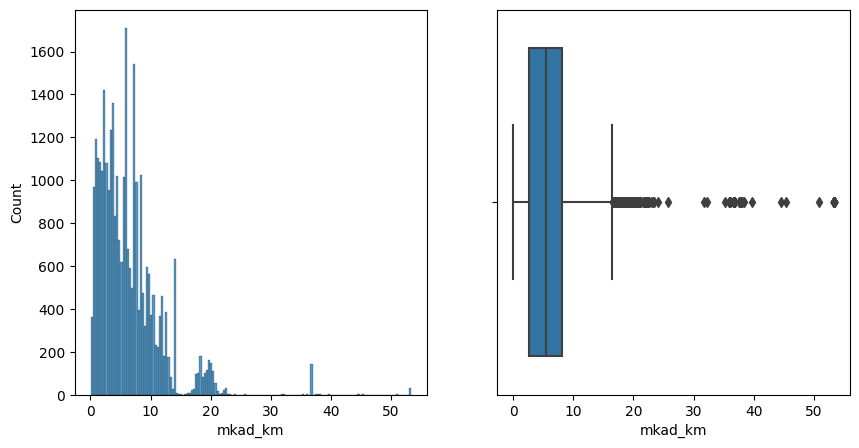

In [12]:
#Метод z-отклонений
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - (left * sigma)
    upper_bound = mu + (right * sigma) 
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
print(f'Число выбросов:{outliers.shape[0]}')
print(f'Число записей: {cleaned.shape[0]}') 

outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True,left = 3, right = 3.5)    

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
histplot = sns.histplot(data=cleaned, x= 'mkad_km', ax=axes[0])  
boxplot = sns.boxplot(data=cleaned, x= 'mkad_km', ax= axes[1])

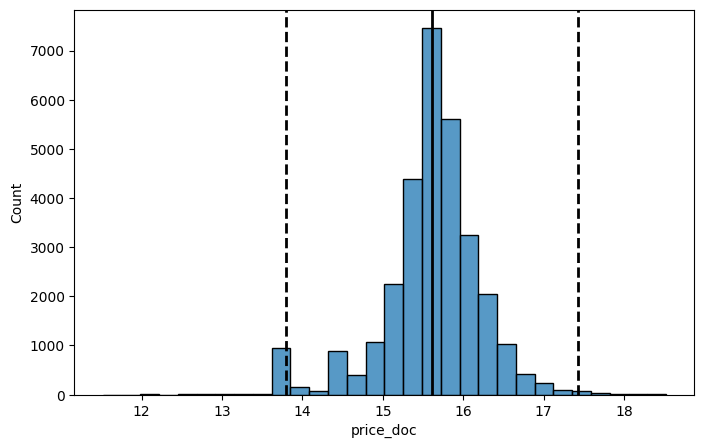

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(data=log_price_doc, bins=30, ax= ax)
histplot.axvline(log_price_doc.mean(), color='k',lw=2)
histplot.axvline(log_price_doc.mean()+3 * log_price_doc.std(), color='k', ls='--',lw=2)
histplot.axvline(log_price_doc.mean()-3 * log_price_doc.std(), color='k', ls='--',lw=2)

Число выбросов:0
Число записей: 30471


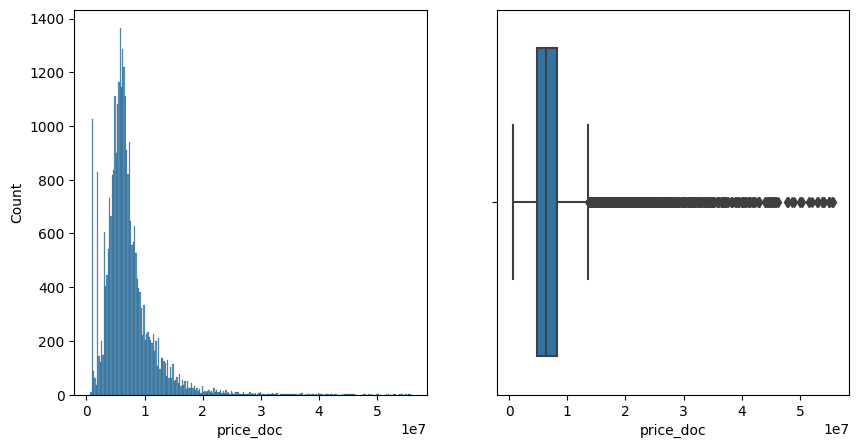

In [14]:
# Найдите потенциальные выбросы по признаку price_doc с помощью метода z-отклонения.
# Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в обе стороны распределения. Сколько выбросов вы получили?
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - (left * sigma)
    upper_bound = mu + (right * sigma) 
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
print(f'Число выбросов:{outliers.shape[0]}')
print(f'Число записей: {cleaned.shape[0]}') 

outliers, cleaned = outliers_z_score(sber_data, 'price_doc', log_scale=True, left=3.7, right = 3.7)    

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
histplot = sns.histplot(data=cleaned, x= 'price_doc', ax=axes[0])  
boxplot = sns.boxplot(data=cleaned, x= 'price_doc', ax= axes[1])

число выбросов по методу Тьюки: 92
результирующее число записей: 30379


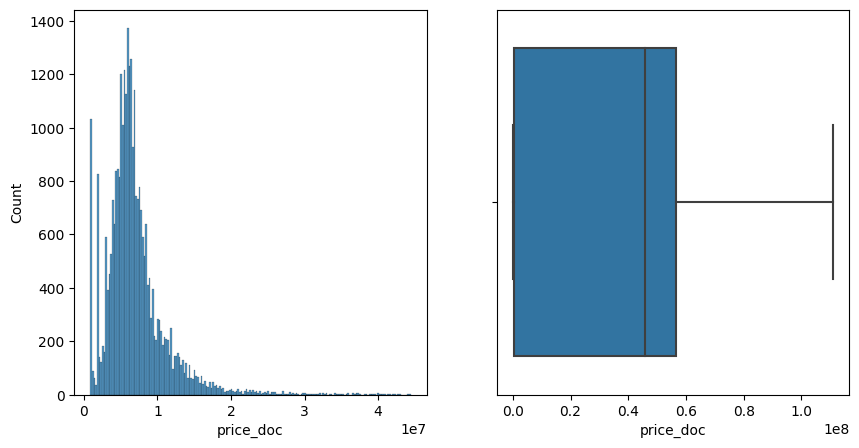

In [15]:
# Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). 
# Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. 
# Примените полученную функцию к признаку price_doc. 
# Число межквартильных размахов в обе стороны обозначьте как 3. 
# Чему равно число выбросов, полученных таким методом?
# При логарифмировании признака price_doc добавлять к нему 1 не нужно, он не имеет нулевых значений!

def outliers_iqr_mod(data, feature, log_scale = False, left = 1.5, right =1.5):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data,  'price_doc', log_scale=True,left = 3, right = 3)
print(f'число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'результирующее число записей: {cleaned.shape[0]}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
histplot = sns.histplot(data=cleaned, x= 'price_doc', ax= axes[0])
boxplot = sns.boxplot(data=outliers, x= 'price_doc', ax=axes[1])

In [16]:
#Дубликаты
sber_data['id'].nunique() == sber_data.shape[0] #для этого сравним число уникальных значений в столбце id с числом строк. 
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')
mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicateds = sber_data[mask]
print(f'Число дубликотов: {sber_duplicateds.shape[0]}')

Число дубликотов: 562


In [18]:
#Создадим новую таблицу sber_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов.
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
sber_dedupped.shape[0]

29909

In [23]:
low_information_cols = []
for col in sber_data.columns:
    top_freq = sber_data[col].value_counts(normalize= True).max()
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}:{round(top_freq * 100,2)}% одинаковых значений')
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}:{round(nunique_ratio * 100,2)}% уникальных значений')
        
print()            
#Удаление
information_sber_data = sber_data.drop(low_information_cols, axis=1)           
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')             

id:100.0% уникальных значений
oil_chemistry_raion:99.03% одинаковых значений
railroad_terminal_raion:96.27% одинаковых значений
nuclear_reactor_raion:97.17% одинаковых значений
big_road1_1line:97.44% одинаковых значений
mosque_count_1000:98.08% одинаковых значений

Результирующее число признаков: 55
